### CAPSTONE PROJECT - WINE LIST RECOMMENDER

### MASTER WINE CATALOG ASSEMBLY

**OVERVIEW:**

This notebook covers the following items:

- Creates the master wine catalog file by combining each of the master category files composed to date
- Applies several global commands to complete cleaning data (i.e. convert price column to floats from strings, etc)
- Conducts initial EDA on the resulting dataset


#### IMPORT PACKAGES AND DATAFILES 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#import all of our master sets
df_1=pd.read_csv('./data/red_master.csv')
df_2=pd.read_csv('./data/white_master.csv')
df_3=pd.read_csv('./data/rose_master.csv')
df_4=pd.read_csv('./data/sparkling_master.csv')
df_5=pd.read_csv('./data/port_master.csv')
df_6=pd.read_csv('./data/dessert_master.csv')

#### CONCATENATE ALL FILES TO MASTER CATALOG

In [3]:
#stitch all master sets together with concat
wine_catalog=pd.concat([df_1,df_2,df_3,df_4,df_5,df_6],axis=0)

In [4]:
#what does the new dataframe look like?
#need to address price
wine_catalog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33163 entries, 0 to 844
Data columns (total 11 columns):
Unnamed: 0       33163 non-null int64
winery           33163 non-null object
wine             33163 non-null object
location         33150 non-null object
rating           33163 non-null float64
price            33163 non-null object
wine_category    33163 non-null object
country          33150 non-null object
region           33150 non-null object
vintage          33163 non-null object
wine_style       33163 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 3.0+ MB


In [5]:
#clean up index
wine_catalog.reset_index(level=None, drop=True, inplace=True)

In [6]:
#remove unnamed column
wine_catalog.drop(['Unnamed: 0'],axis=1,inplace=True)
wine_catalog.drop(['location'],axis=1,inplace=True)

In [7]:
wine_catalog.head(25)

,winery,wine,rating,price,wine_category,country,region,vintage,wine_style
0,Caymus,Cabernet Sauvignon N.V.,4.6,$79.05,red,United States,Napa Valley,N.V.,Cabernet Sauvignon
1,The Prisoner,The Prisoner N.V.,4.4,$39.75,red,United States,Napa Valley,N.V.,Blend
2,Masi,Costasera Amarone della Valpolicella Classico ...,4.3,$54.99,red,Italy,Amarone della Valpolicella Classico,N.V.,Valpolicella
3,Stag's Leap Wine Cellars,ARTEMIS Cabernet Sauvignon N.V.,4.3,$59.99,red,United States,Napa Valley,N.V.,Cabernet Sauvignon
4,Banfi,Brunello di Montalcino N.V.,4.2,$65.98,red,Italy,Brunello di Montalcino,N.V.,Brunello
5,Opus One,Opus One N.V.,4.6,$364.99,red,United States,Napa Valley,N.V.,Blend
6,Vega Sicilia,Valbuena 5º N.V.,4.6,$159.48,red,Spain,Ribera del Duero,N.V.,Blend
7,Château Musar,Rouge (Gaston Hochar) N.V.,4.2,$76.98,red,Lebanon,Bekaa Valley,N.V.,Blend
8,Alión,Ribera del Duero N.V.,4.4,$86.88,red,Spain,Ribera del Duero,N.V.,Blend
9,Silver Oak,Napa Valley Cabernet Sauvignon N.V.,4.5,$119.80,red,United States,Napa Valley,N.V.,Cabernet Sauvignon


In [8]:
#check mins and max on ratings
wine_catalog.describe()

,rating
count,33163.000000
mean,4.013569
std,0.316677
min,2.700000
25%,3.800000
50%,4.000000
75%,4.300000
max,4.900000


**NOTE:** 

At this point we can recognize our dataframe has 33,163 individual observations by wine, and our ratings have a minimum of 2.7 and a maximum of 4.9.

#### PRICE COLUMN ADJUSTMENTS

In our earlier notebooks we noticed that there were a number of instances where the Vivino site would carry a rated wine but direct consumers to another online store for price point and a potential sale if it was not a product carried by Vivino's e-commerce system.  Here we will filter out those references into a separate column that we can call upon later, which will allow us to convert prices to floats and evaluate overall pricing in our EDA.

In [9]:
#let's address pricing
#a number of entries that carried links to other shops instead of pricing
#want to keep the ratings, and still be able to run EDA on pricing
#move View Shops to a new column so we can do some price analysis and still have a reference(don't lose data)

wine_catalog['price'].value_counts()

View shops    5137
$16.99        1608
$29.99        1254
$14.99        1208
$13.99        1090
              ... 
$17.92           1
$354.99          1
$306.99          1
$13.61           1
$323.99          1
Name: price, Length: 1046, dtype: int64

In [10]:
#instantiate column
wine_catalog["contact_for_price"]=""

In [11]:
#reorder columns as desired
columns=['winery','wine','rating','wine_style','wine_category','vintage','region','country','price','contact_for_price']

wine_catalog=wine_catalog[columns]

In [12]:
wine_catalog.head()

,winery,wine,rating,wine_style,wine_category,vintage,region,country,price,contact_for_price
0,Caymus,Cabernet Sauvignon N.V.,4.6,Cabernet Sauvignon,red,N.V.,Napa Valley,United States,$79.05,
1,The Prisoner,The Prisoner N.V.,4.4,Blend,red,N.V.,Napa Valley,United States,$39.75,
2,Masi,Costasera Amarone della Valpolicella Classico ...,4.3,Valpolicella,red,N.V.,Amarone della Valpolicella Classico,Italy,$54.99,
3,Stag's Leap Wine Cellars,ARTEMIS Cabernet Sauvignon N.V.,4.3,Cabernet Sauvignon,red,N.V.,Napa Valley,United States,$59.99,
4,Banfi,Brunello di Montalcino N.V.,4.2,Brunello,red,N.V.,Brunello di Montalcino,Italy,$65.98,


In [13]:
#just caught this lowercase r in red in wine_category...simple clean up...
wine_catalog.loc[wine_catalog['wine_category'].str.contains('red'),'wine_category'] = 'Red' 

In [14]:
#indicate which items/rows will need further discussion on price outside of the dataframe
#places a marker in the contact_for_price column so we can remove strings and convert price column to dtype float
def viewshop(x):
    wine_catalog.loc[wine_catalog['price'].str.contains(x),'contact_for_price']= "contact"        

In [15]:
#run function with first word of string
viewshop('View')

In [16]:
#output shows many of these instances come from the Rose, Sparkling, Dessert, and Port categories. not red and white
#this should be fine for our current purposes, long term seek to add in the 5,000+ prices to database
wine_catalog[wine_catalog['contact_for_price'].str.match("contact")]

,winery,wine,rating,wine_style,wine_category,vintage,region,country,price,contact_for_price
20900,Minuty,281 Rosé 2016,4.5,Rosé,Rose,2016,Provence,France,View shops,contact
20901,Inman Family,OGV Estate Endless Crush Rosé Of Pinot Noir 2018,4.5,Pinot,Rose,2018,Russian River Valley,United States,View shops,contact
20902,Château Simone,Palette Rose 2016,4.5,Rosé,Rose,2016,Palette,France,View shops,contact
20903,Minuty,281 Rosé 2018,4.4,Rosé,Rose,2018,Provence,France,View shops,contact
20904,Minuty,281 Rosé N.V.,4.4,Rosé,Rose,N.V.,Provence,France,View shops,contact
...,...,...,...,...,...,...,...,...,...,...
33158,Château de Rayne Vigneau,Sauternes (Premier Grand Cru Classé) 2013,3.6,Sauternes,Dessert,2013,Sauternes,France,View shops,contact
33159,Undurraga,Late Harvest Reserva Sémillon 2014,3.6,Sémillon,Dessert,2014,Maipo Valley,Chile,View shops,contact
33160,Château Bastor-Lamontagne,Sauternes 2014,3.6,Sauternes,Dessert,2014,Sauternes,France,View shops,contact
33161,Château de Myrat,Sauternes (Grand Cru Classé) 2013,3.5,Sauternes,Dessert,2013,Sauternes,France,View shops,contact


In [17]:
#convert "View Shops" to a string value of 0 so we can address a global dtype conversion to float later
wine_catalog['price'] =wine_catalog.price.str.replace('View shops',"0")

In [18]:
#confirm it worked
wine_catalog[wine_catalog['contact_for_price'].str.match("contact")]

,winery,wine,rating,wine_style,wine_category,vintage,region,country,price,contact_for_price
20900,Minuty,281 Rosé 2016,4.5,Rosé,Rose,2016,Provence,France,0,contact
20901,Inman Family,OGV Estate Endless Crush Rosé Of Pinot Noir 2018,4.5,Pinot,Rose,2018,Russian River Valley,United States,0,contact
20902,Château Simone,Palette Rose 2016,4.5,Rosé,Rose,2016,Palette,France,0,contact
20903,Minuty,281 Rosé 2018,4.4,Rosé,Rose,2018,Provence,France,0,contact
20904,Minuty,281 Rosé N.V.,4.4,Rosé,Rose,N.V.,Provence,France,0,contact
...,...,...,...,...,...,...,...,...,...,...
33158,Château de Rayne Vigneau,Sauternes (Premier Grand Cru Classé) 2013,3.6,Sauternes,Dessert,2013,Sauternes,France,0,contact
33159,Undurraga,Late Harvest Reserva Sémillon 2014,3.6,Sémillon,Dessert,2014,Maipo Valley,Chile,0,contact
33160,Château Bastor-Lamontagne,Sauternes 2014,3.6,Sauternes,Dessert,2014,Sauternes,France,0,contact
33161,Château de Myrat,Sauternes (Grand Cru Classé) 2013,3.5,Sauternes,Dessert,2013,Sauternes,France,0,contact


In [19]:
#Recommendation on cleaning up currency from "https://pbpython.com/currency-cleanup.html"
#If the value is a string, then remove currency symbol and delimiters otherwise, the value is numeric and can be converted

def clean_currency(x):
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [20]:
#apply function to price column to convert to float
wine_catalog['price'] = wine_catalog['price'].apply(clean_currency).astype('float')

In [21]:
wine_catalog.head()

,winery,wine,rating,wine_style,wine_category,vintage,region,country,price,contact_for_price
0,Caymus,Cabernet Sauvignon N.V.,4.6,Cabernet Sauvignon,Red,N.V.,Napa Valley,United States,79.05,
1,The Prisoner,The Prisoner N.V.,4.4,Blend,Red,N.V.,Napa Valley,United States,39.75,
2,Masi,Costasera Amarone della Valpolicella Classico ...,4.3,Valpolicella,Red,N.V.,Amarone della Valpolicella Classico,Italy,54.99,
3,Stag's Leap Wine Cellars,ARTEMIS Cabernet Sauvignon N.V.,4.3,Cabernet Sauvignon,Red,N.V.,Napa Valley,United States,59.99,
4,Banfi,Brunello di Montalcino N.V.,4.2,Brunello,Red,N.V.,Brunello di Montalcino,Italy,65.98,


#### ADDRESS NULL REGION & COUNTRY VALUES

There was a small set of entries to Vivino that did not carry information for region or country where it was required.  Rather than drop the data, it was worthwhile to research the subset of rows that were missing and add their information.

In [22]:
#noticed this in a few of the submasters, address it quickly now in the master catalog
wine_catalog.isnull().sum()

winery                0
wine                  0
rating                0
wine_style            0
wine_category         0
vintage               0
region               13
country              13
price                 0
contact_for_price     0
dtype: int64

In [23]:
#since there's only 13, and I confirmed there was no listing on the original site, decided to add to the data
#two high price points and a handful of mid to lower ratings made the effort seem worthwhile
wine_catalog[wine_catalog['region'].isnull()]

,winery,wine,rating,wine_style,wine_category,vintage,region,country,price,contact_for_price
5546,Ao Yun (敖云葡萄园),Shangri-La (敖云) 2015,4.1,Blend,Red,2015,NaN,NaN,335.99,
5818,Ao Yun (敖云葡萄园),Shangri-La (敖云) 2014,3.9,Blend,Red,2014,NaN,NaN,249.99,
7347,Volver,Tarima Monastrell 2018,3.9,Blend,Red,2018,NaN,NaN,10.99,
8992,Karas,Red 2017,4.0,Blend,Red,2017,NaN,NaN,14.99,
14095,Karas,White 2017,3.8,Chardonnay,White,2017,NaN,NaN,14.99,
16061,Karas,White 2017,3.8,Chardonnay,White,2017,NaN,NaN,14.99,
16539,Château Burgozone,Chardonnay 2016,3.3,Chardonnay,White,2016,NaN,NaN,15.99,
16759,Browne,Heritage Chardonnay 2016,3.7,Chardonnay,White,2016,NaN,NaN,16.99,
22366,Karas,Extra Brut N.V.,3.7,Brut,Sparkling,N.V.,NaN,NaN,16.99,
24941,Karas,Extra Brut N.V.,3.7,Brut,Sparkling,N.V.,NaN,NaN,16.99,


In [24]:
#Adjust all NaN's to their proper region and country:
wine_catalog.loc[wine_catalog['winery'].str.contains('Karas'),'region']= "Armenia" 
wine_catalog.loc[wine_catalog['winery'].str.contains('Karas'),'country']= "Armenia" 
wine_catalog.loc[wine_catalog['winery'].str.contains('Ao Yun'),'region']= "Himalayas" 
wine_catalog.loc[wine_catalog['winery'].str.contains('Ao Yun'),'country']= "China" 
wine_catalog.loc[wine_catalog['winery'].str.contains('Volver'),'region']= "Alicante" 
wine_catalog.loc[wine_catalog['winery'].str.contains('Volver'),'country']= "Spain" 
wine_catalog.loc[wine_catalog['winery'].str.contains('Château Burgozone'),'region']= "Oryahovo" 
wine_catalog.loc[wine_catalog['winery'].str.contains('Château Burgozone'),'country']= "Bulgaria" 
wine_catalog.loc[wine_catalog['winery'].str.contains('Browne'),'region']= "Washington" 
wine_catalog.loc[wine_catalog['winery'].str.contains('Browne'),'country']= "United States" 
wine_catalog.loc[wine_catalog['winery'].str.contains('Dow'),'region']= "Senhora da Ribeira" 
wine_catalog.loc[wine_catalog['winery'].str.contains('Dow'),'country']= "Portugal" 


In [25]:
wine_catalog[wine_catalog['region'].isnull()]

,winery,wine,rating,wine_style,wine_category,vintage,region,country,price,contact_for_price


In [26]:
wine_catalog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33163 entries, 0 to 33162
Data columns (total 10 columns):
winery               33163 non-null object
wine                 33163 non-null object
rating               33163 non-null float64
wine_style           33163 non-null object
wine_category        33163 non-null object
vintage              33163 non-null object
region               33163 non-null object
country              33163 non-null object
price                33163 non-null float64
contact_for_price    33163 non-null object
dtypes: float64(2), object(8)
memory usage: 2.5+ MB


In [27]:
wine_catalog["wine_category"].value_counts()

White        11325
Sparkling    10300
Red           9500
Port           873
Dessert        845
Rose           320
Name: wine_category, dtype: int64

#### ENCODING PREP FOR EDA

Instituted label encoding in the event it might be needed for EDA or Feature Engineering

In [28]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
wine_catalog['wine_style_code']= le.fit_transform(wine_catalog['wine_style']) 
wine_catalog['wine_category_code']=le.fit_transform(wine_catalog['wine_category'])
wine_catalog['region_code']=le.fit_transform(wine_catalog['region'])
wine_catalog['country_code']=le.fit_transform(wine_catalog['country'])

In [29]:
wine_catalog.head()

,winery,wine,rating,wine_style,wine_category,vintage,region,country,price,contact_for_price,wine_style_code,wine_category_code,region_code,country_code
0,Caymus,Cabernet Sauvignon N.V.,4.6,Cabernet Sauvignon,Red,N.V.,Napa Valley,United States,79.05,,15,2,587,36
1,The Prisoner,The Prisoner N.V.,4.4,Blend,Red,N.V.,Napa Valley,United States,39.75,,10,2,587,36
2,Masi,Costasera Amarone della Valpolicella Classico ...,4.3,Valpolicella,Red,N.V.,Amarone della Valpolicella Classico,Italy,54.99,,86,2,34,19
3,Stag's Leap Wine Cellars,ARTEMIS Cabernet Sauvignon N.V.,4.3,Cabernet Sauvignon,Red,N.V.,Napa Valley,United States,59.99,,15,2,587,36
4,Banfi,Brunello di Montalcino N.V.,4.2,Brunello,Red,N.V.,Brunello di Montalcino,Italy,65.98,,12,2,120,19


In [30]:
wine_catalog.to_csv('./data/wine_catalog.csv')

### EXPLORATORY DATA ANALYSIS

**SUMMARY:**

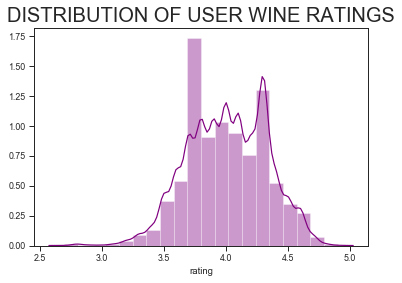

In [47]:
#Vivino's user distribiution ratings are based on a 1 to 5 system, with .5 steps inbetween.
#Of our observations, distribution appears to be symmetricaly centered around 4 and approaching normal, with two prominent peaks at 3.7 and 4.3 
sns.distplot(wine_catalog.rating,bins=20,color='purple');
plt.title('DISTRIBUTION OF USER WINE RATINGS', fontsize=20);

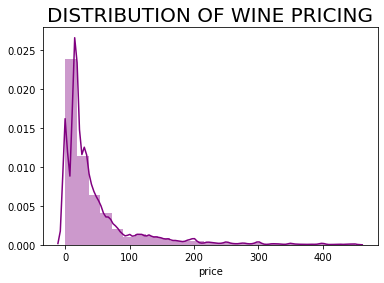

In [32]:
#This histogram is skewed left, with the majority of pricing refected under $100 a bottle
#In a left skewed historgram, the mean is less than the median

sns.distplot(wine_catalog.price,bins=25,color='purple');
plt.title('DISTRIBUTION OF WINE PRICING', fontsize=20);


C:\Users\tonyb\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  import sys


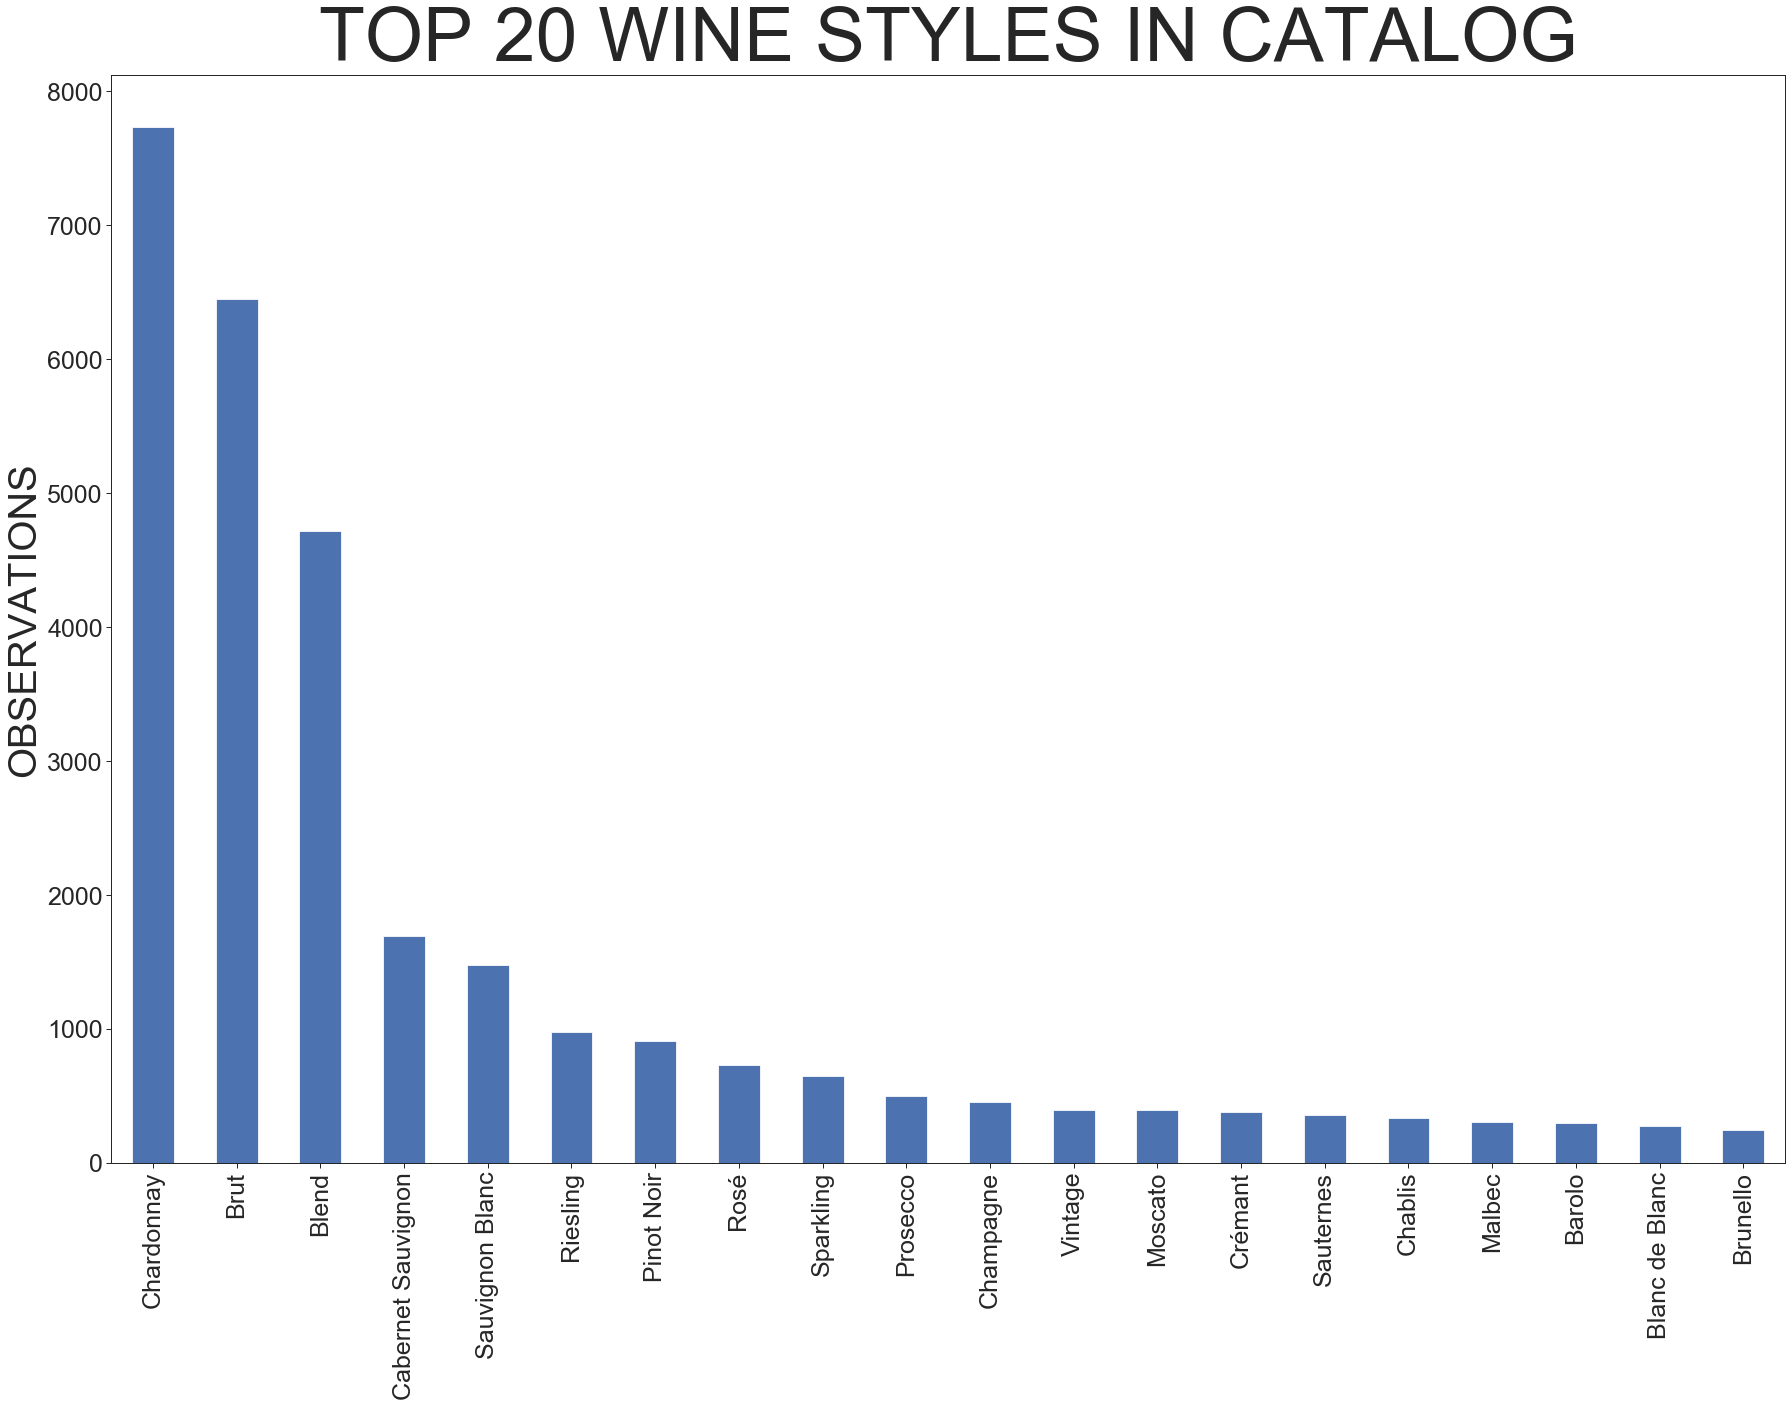

In [52]:
#this bar chart reflects the top wine 20 styles in the catalog, out of a collection of 96
#the top 5 wine styles are in keeping with national retail trends of consumer demand


plt.figure(figsize=(30, 20))

wine_catalog['wine_style'].value_counts().head(20).plot('bar')

plt.title('TOP 20 WINE STYLES IN CATALOG', fontsize=75);

degrees=90
plt.xticks(fontsize=25, rotation=degrees)
plt.yticks(fontsize=25)

plt.ylabel('OBSERVATIONS', fontsize=40)
plt.show()

C:\Users\tonyb\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


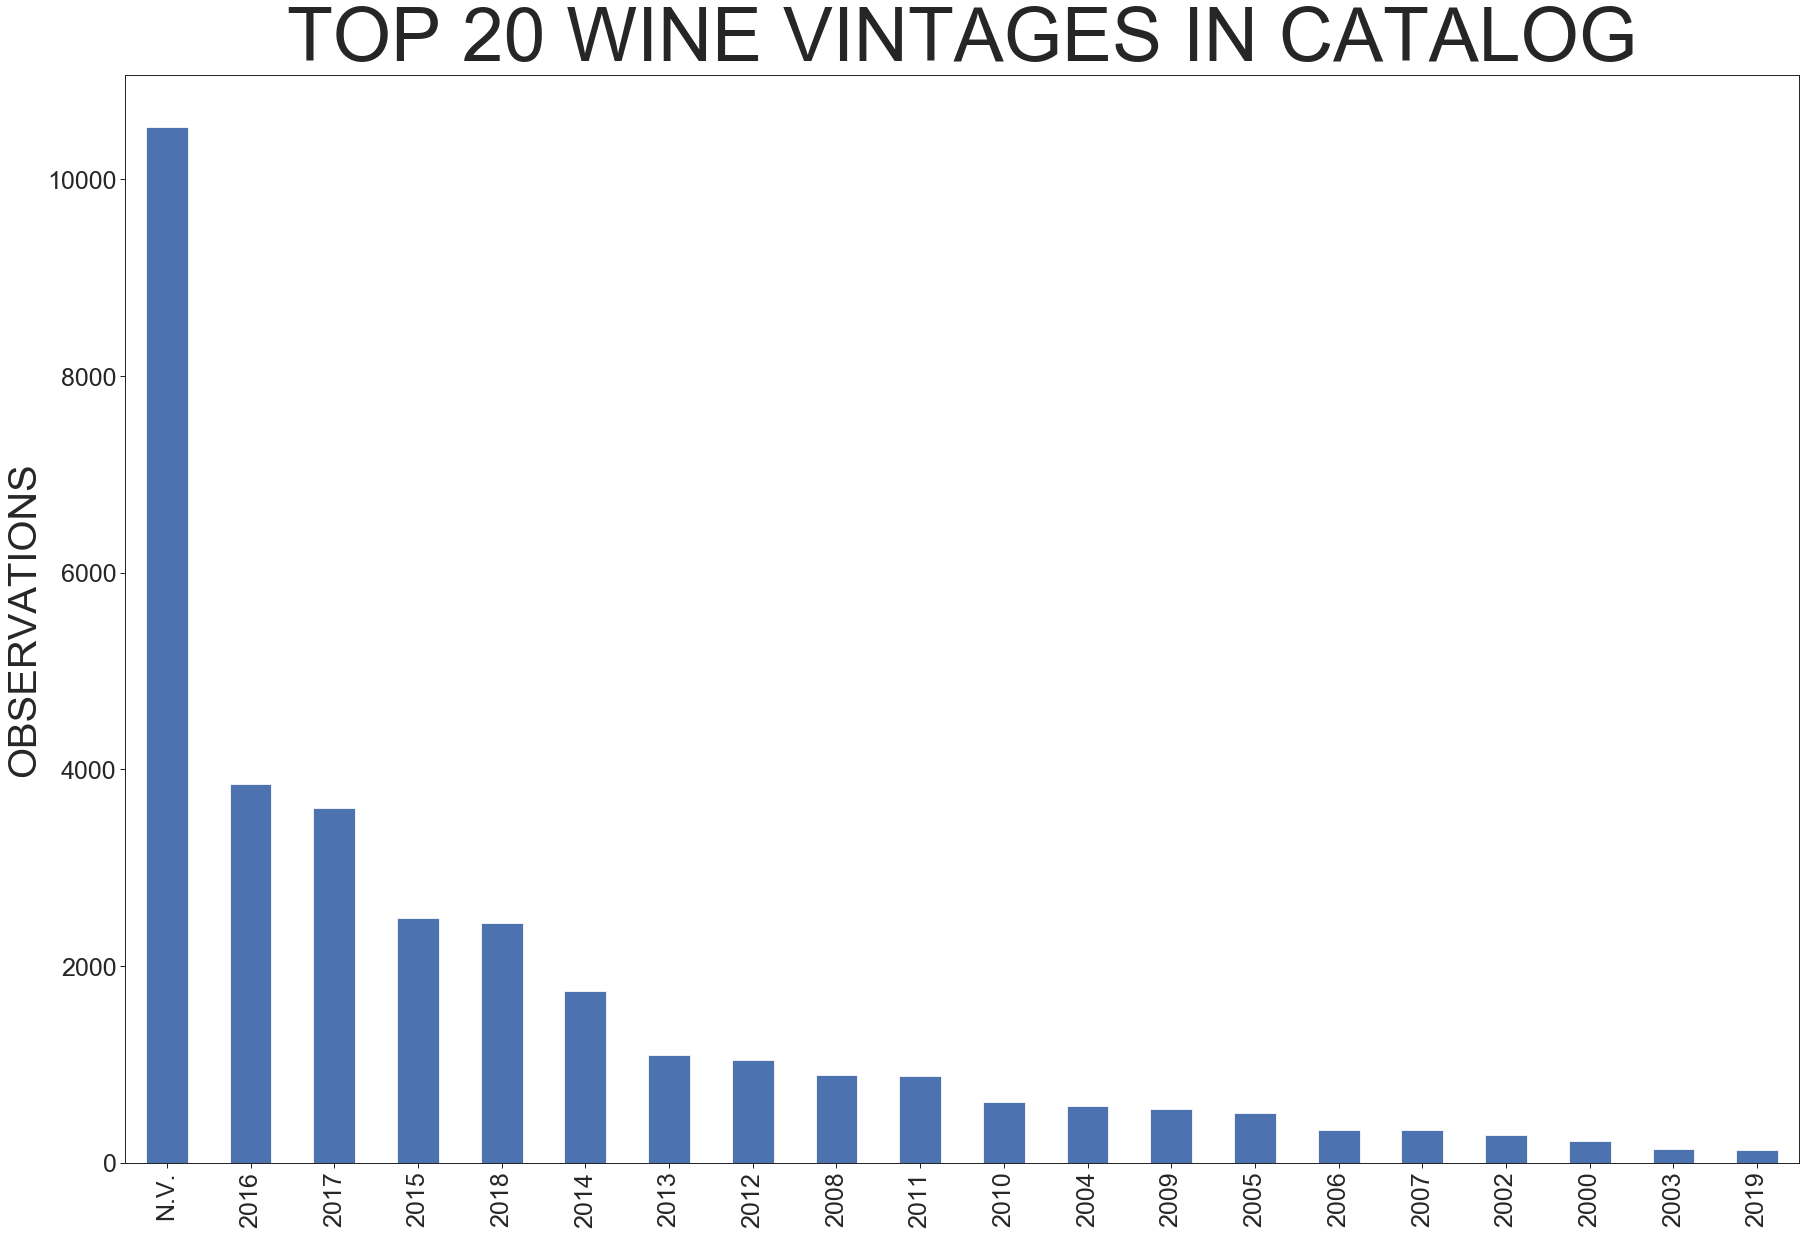

In [53]:
# the top vintage is N.V. which reflects no vintage, indicative of winemakers creating blends, and indicative of this dataset
# not surprising that the top 5 vintages reflect the past 5 years of release, especially in established red and white varietals

plt.figure(figsize=(30, 20))

wine_catalog['vintage'].value_counts().head(20).plot('bar')

#plt.bar(wine_catalog['wine_style'].value_counts().index,
#        wine_catalog['wine_style'].value_counts())

plt.title('TOP 20 WINE VINTAGES IN CATALOG', fontsize=75);

degrees=90
plt.xticks(fontsize=25, rotation=degrees)
plt.yticks(fontsize=25)

plt.ylabel('OBSERVATIONS', fontsize=40)
plt.show()

C:\Users\tonyb\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


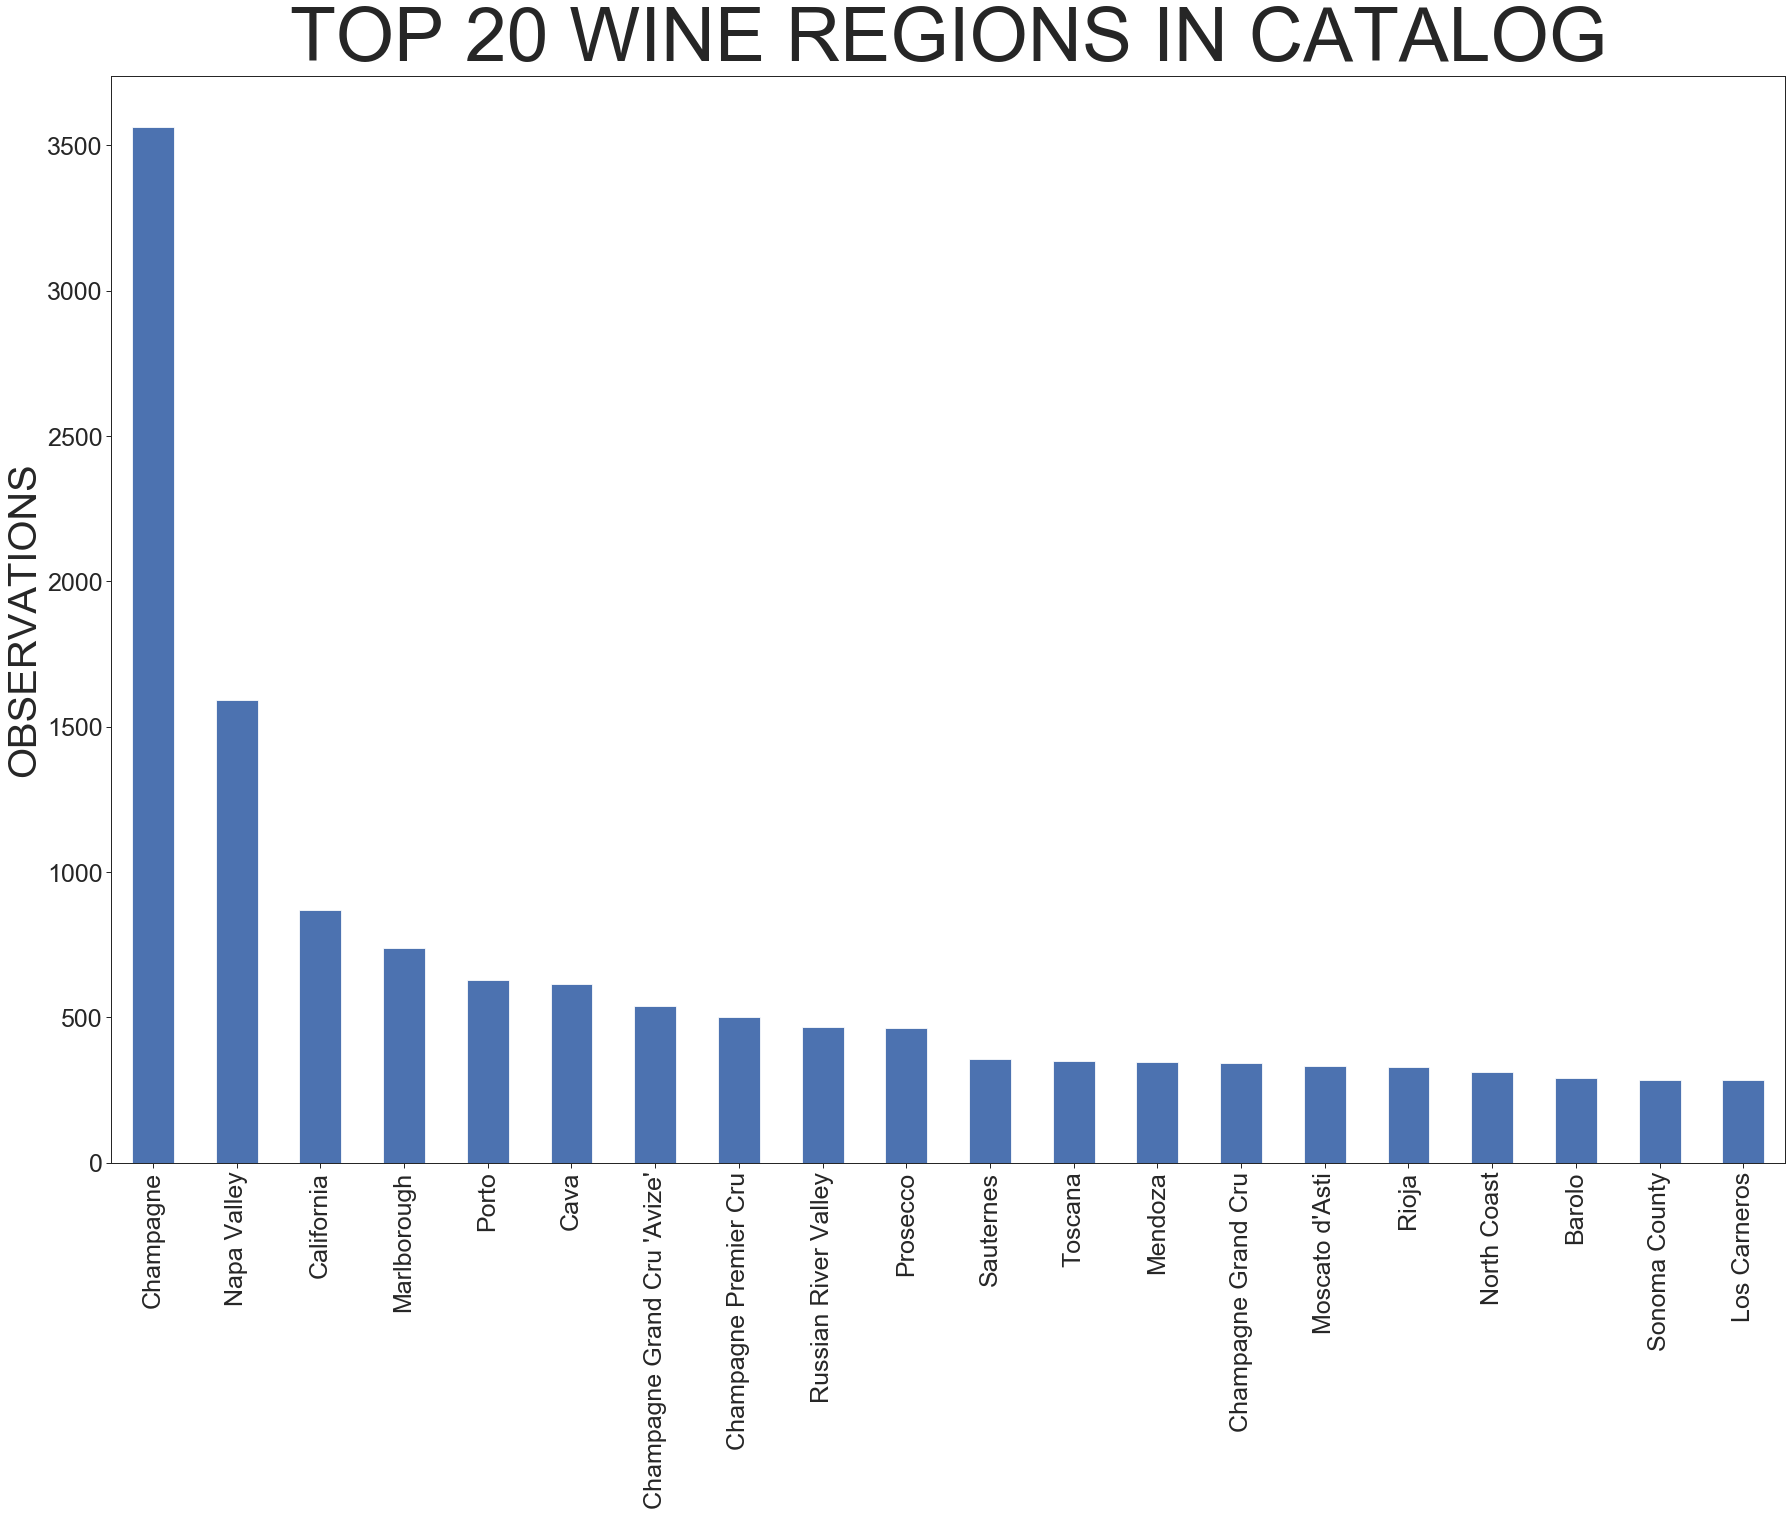

In [54]:
# the top five wine regions in the catalog reflect two dynamics:
# The popularity of champagne goes beyond the product but also reflects chardonnay made in this region, hence the high observations
# Fair expectation that Napa Valley is a close second based on variety and similar growing climate to Champagne


plt.figure(figsize=(30, 20))

wine_catalog['region'].value_counts().head(20).plot('bar')

#plt.bar(wine_catalog['wine_style'].value_counts().index,
#        wine_catalog['wine_style'].value_counts())

plt.title('TOP 20 WINE REGIONS IN CATALOG', fontsize=75);

degrees=90
plt.xticks(fontsize=25, rotation=degrees)
plt.yticks(fontsize=25)

plt.ylabel('OBSERVATIONS', fontsize=40)
plt.show()

C:\Users\tonyb\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  if __name__ == '__main__':


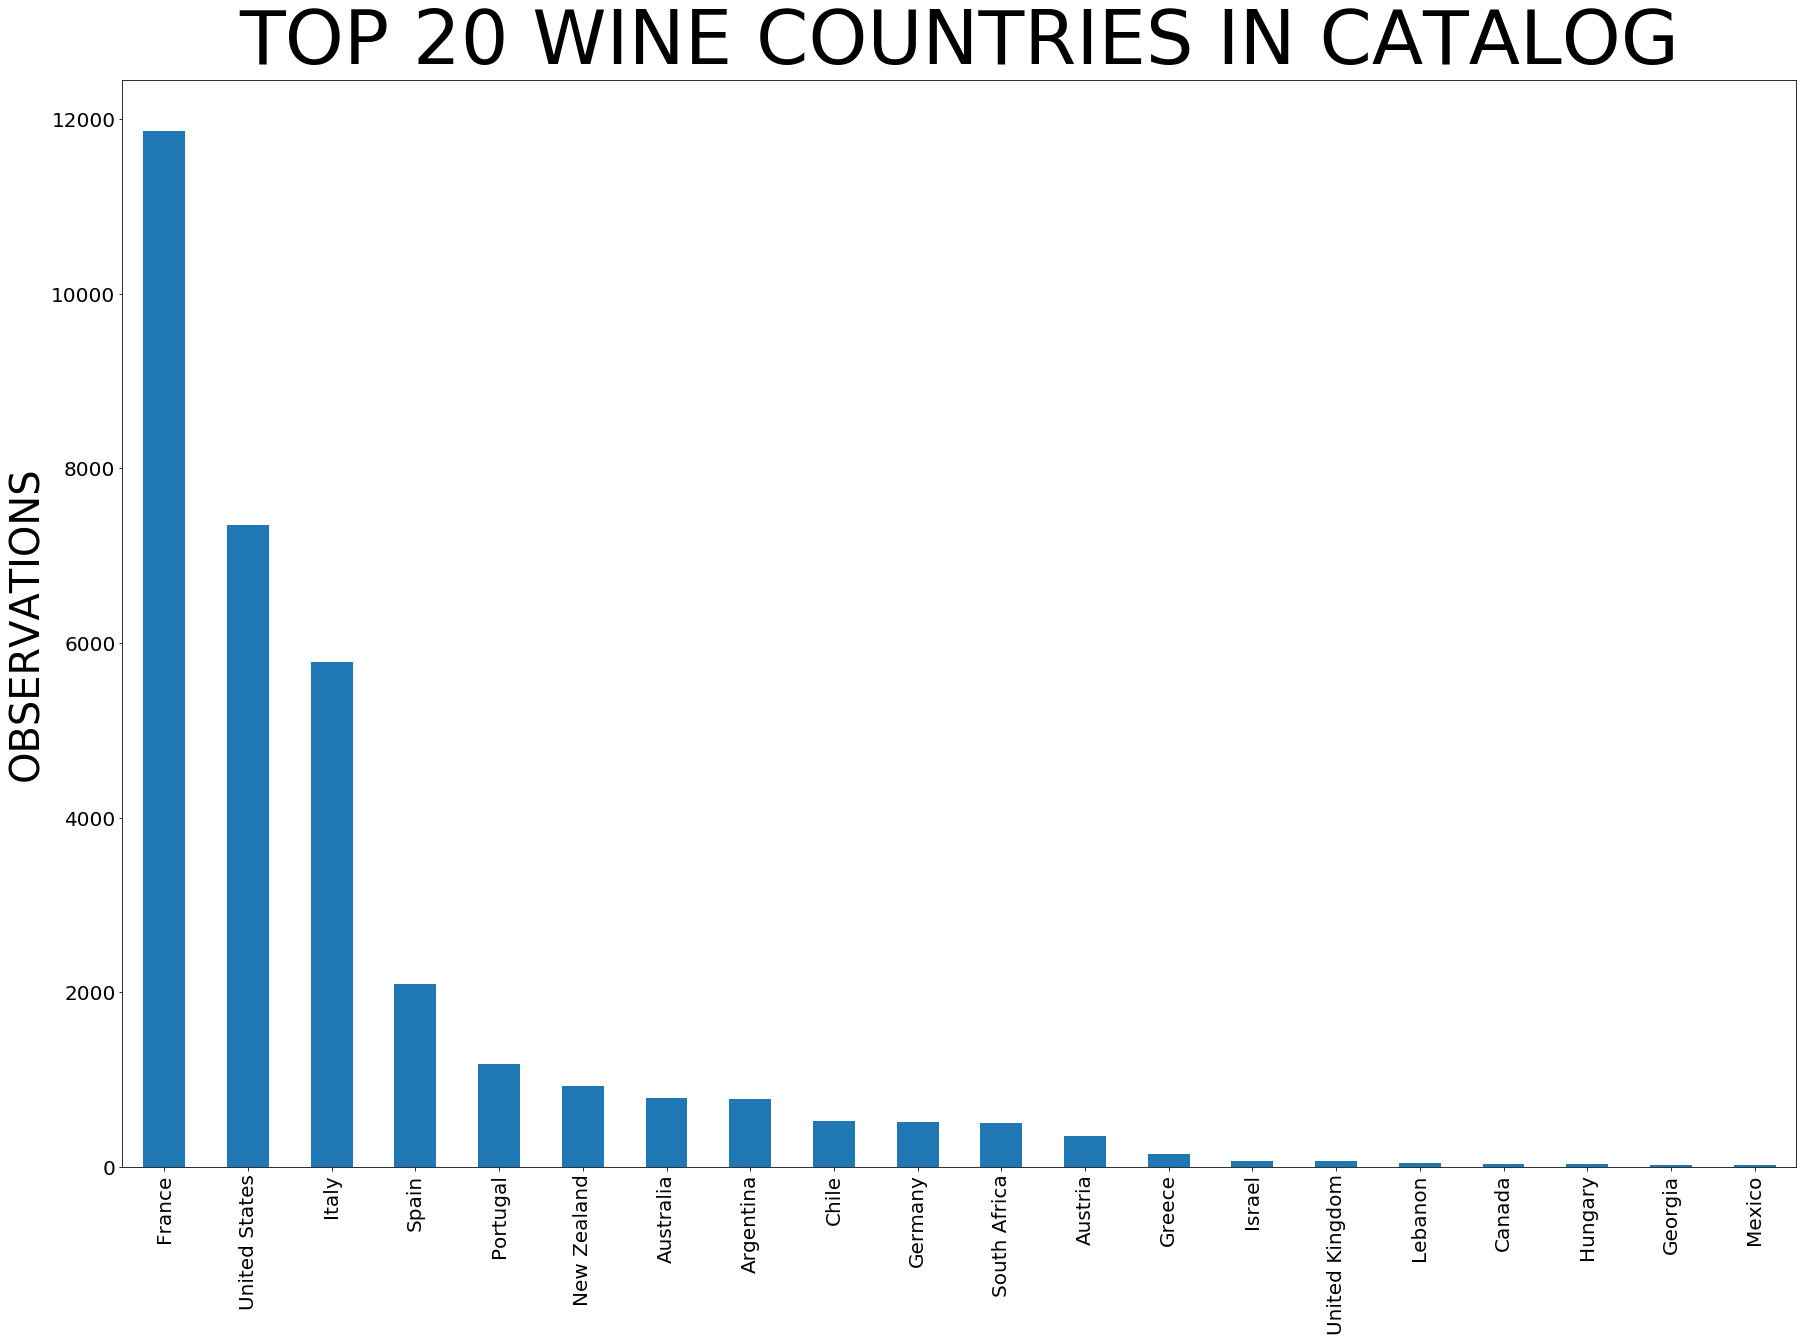

In [36]:
#Old world wines are reflected as the Eurpoean block (France, Italy, Spain, Portugal)
#New world wines (New Zealand, Australia, Argentina and Chile) have increased in popularity typically for their unique characteristics of vineyard growth and wine styles
#The majority of US wine country is Napa Valley,



plt.figure(figsize=(30, 20))

wine_catalog['country'].value_counts().head(20).plot('bar')

#plt.bar(wine_catalog['wine_style'].value_counts().index,
#        wine_catalog['wine_style'].value_counts())

plt.title('TOP 20 WINE COUNTRIES IN CATALOG', fontsize=75);

degrees=90
plt.xticks(fontsize=20, rotation=degrees)
plt.yticks(fontsize=20)

plt.ylabel('OBSERVATIONS', fontsize=40)
plt.show()

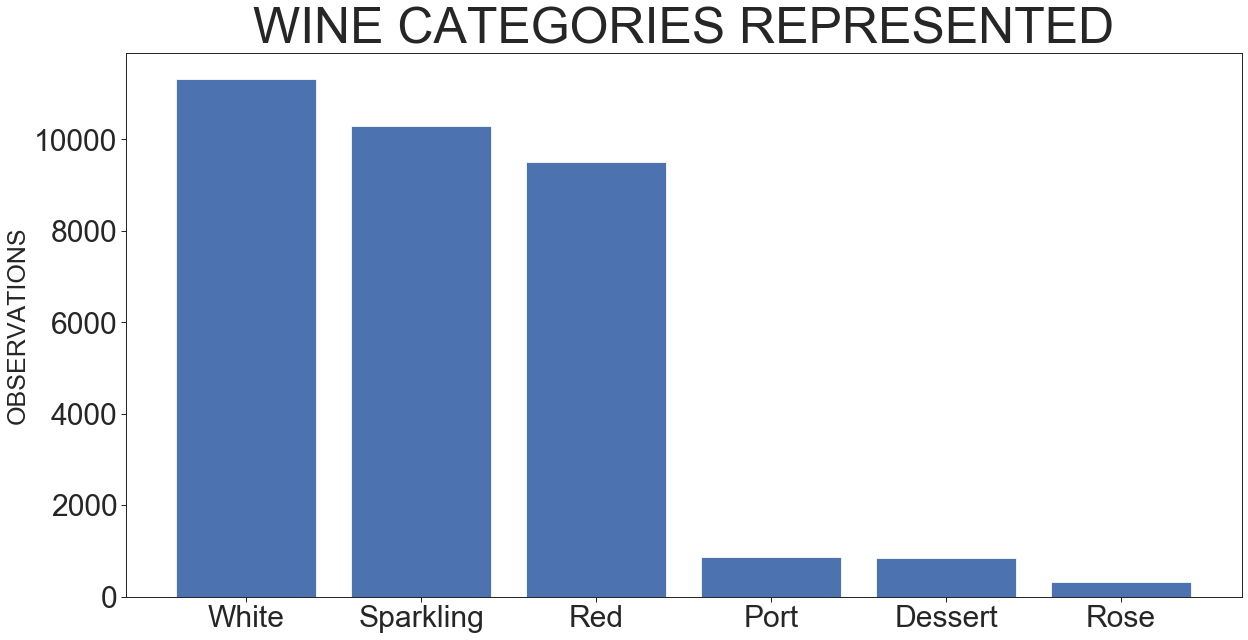

In [57]:
plt.figure(figsize=(20, 10))

plt.bar(wine_catalog['wine_category'].value_counts().index,
        wine_catalog['wine_category'].value_counts())

degrees=0
plt.xticks(fontsize=30, rotation=degrees)
plt.yticks(fontsize=30)

plt.title('WINE CATEGORIES REPRESENTED', fontsize=50);

plt.ylabel('OBSERVATIONS', fontsize=25)
plt.show()

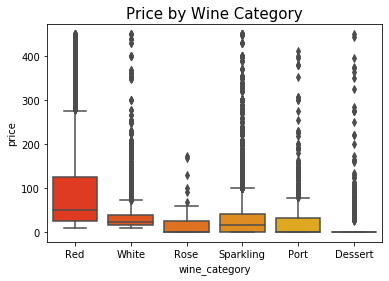

In [38]:
#Based on the boxplot below, Red wine appear to be the most expensive per bottle on average, although there are definitely a few outliers listed above $300
#within the data, the majority of bottles in the categories of white, rose, sparkling and port all appear to be under $50
#Dessert and Sparkling wine are extremely interesting, as their outliers reflect a combination of region, style and older vintage
#The majority of white wine outliers reflect an older vintage

sns.boxplot( x=wine_catalog["wine_category"], y=wine_catalog["price"], palette="autumn");
sns.set_context("paper",rc={"xtick.labelsize":10})
plt.title("Price by Wine Category", fontsize=15)

plt.show()

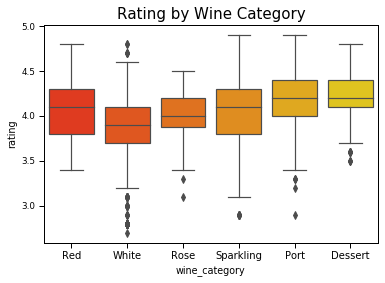

In [39]:
#Overall, ratings appear to find their average footing at around 4.1
#Sparkling covers the widest range of ratings with the fewest outliers
#Red wine appears to be solid within its range with no outliers


sns.boxplot( x=wine_catalog["wine_category"], y=wine_catalog["rating"], palette="autumn");
sns.set_context("paper",rc={"xtick.labelsize":10})
plt.title("Rating by Wine Category", fontsize=15)


plt.show()

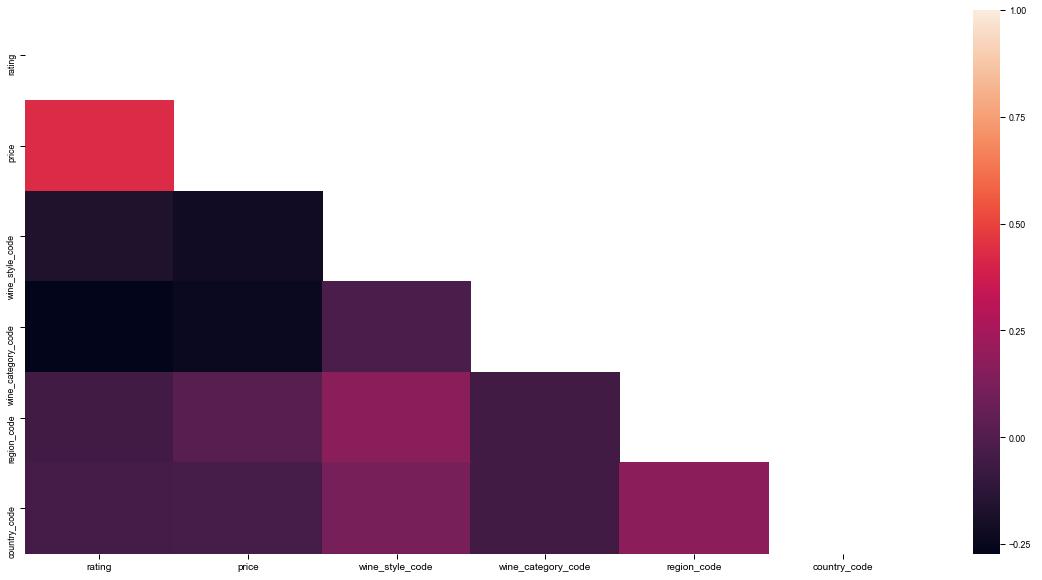

In [40]:
#price and rating are highly correlated

fig = plt.figure(figsize=(20,10))
mask = np.zeros_like(wine_catalog.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(wine_catalog.corr(), mask=mask);
sns.set(font_scale=7)

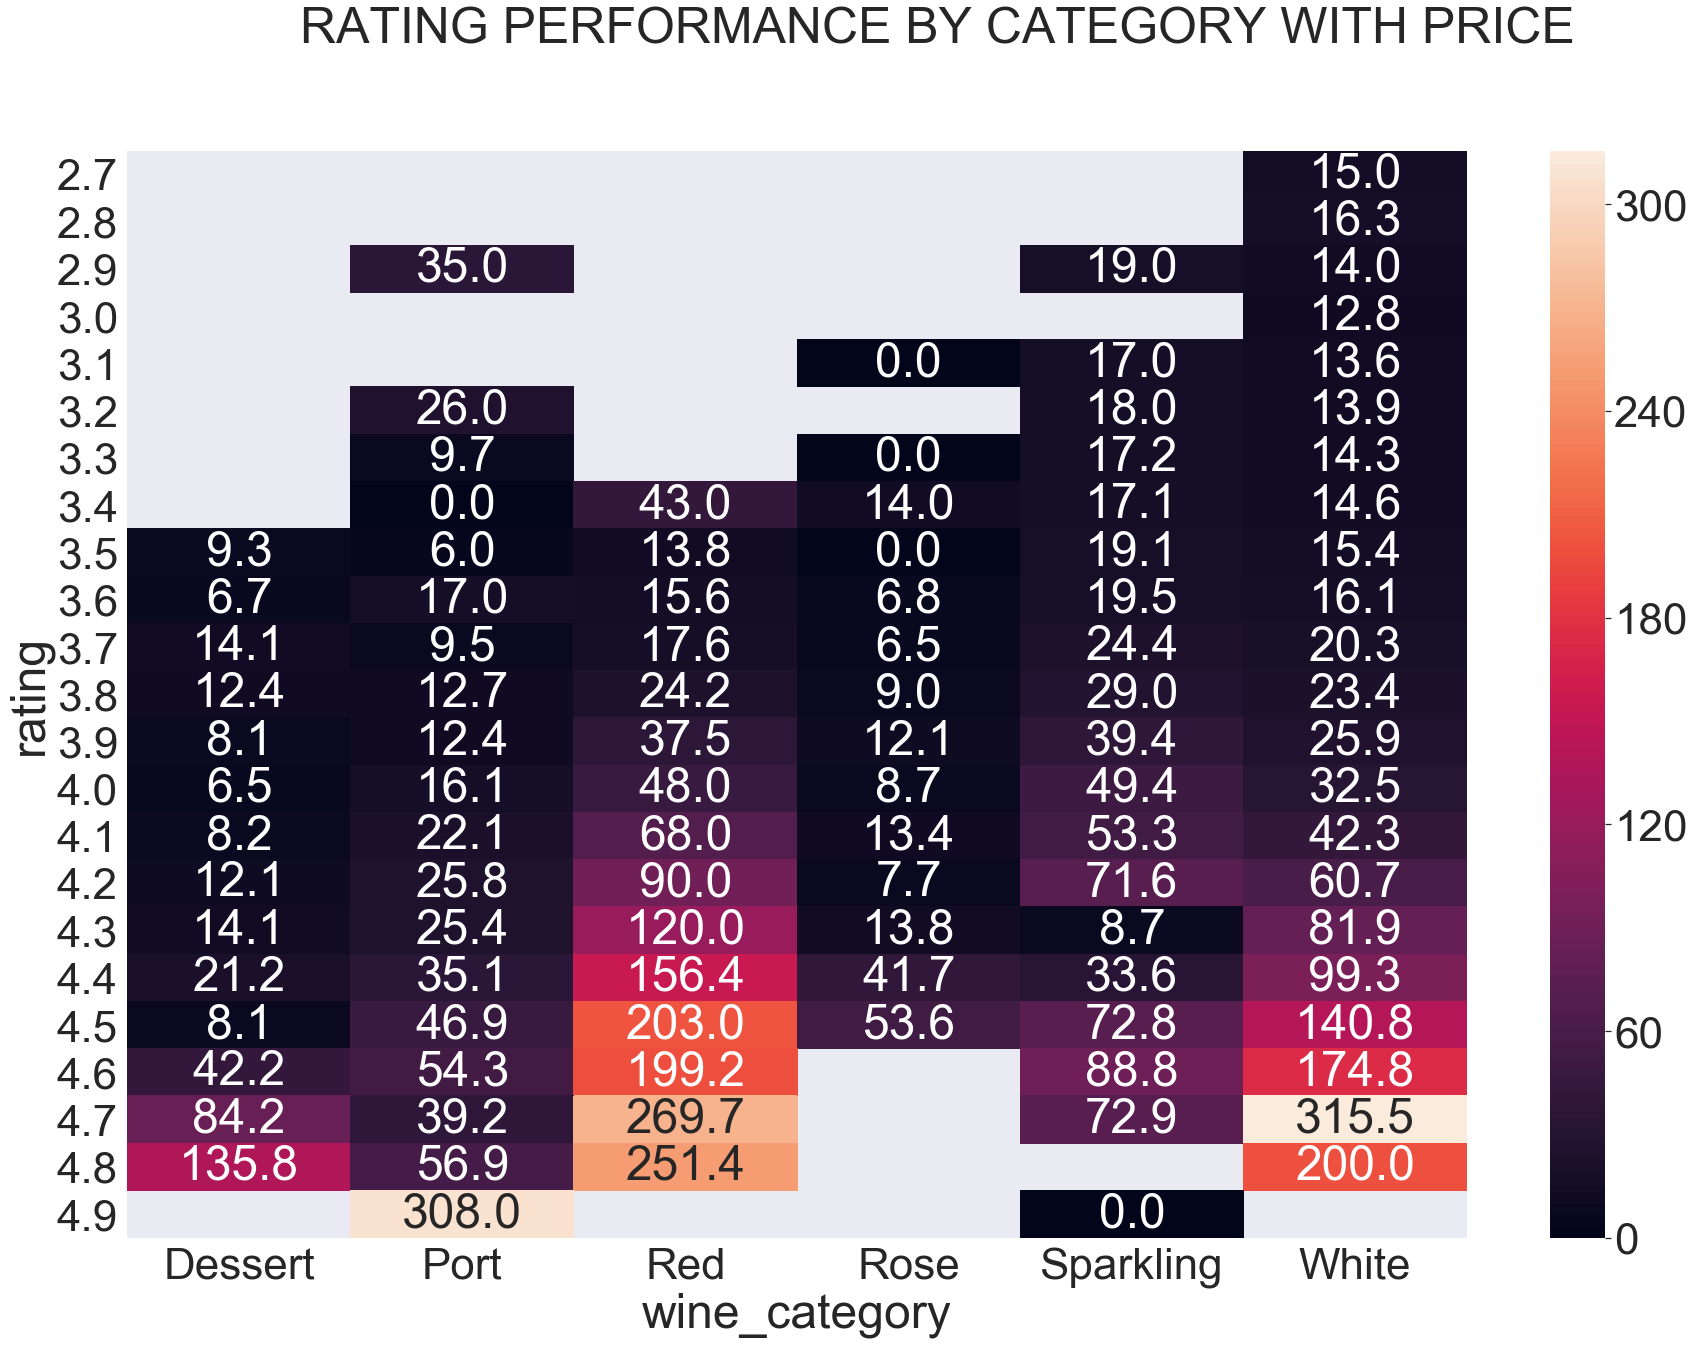

In [65]:
# Our highest correlations between ratings and wine categories is among red and white
# Higher ratings rationalize higher pricepoints as well

fig = plt.figure(figsize = (30,20))
st = fig.suptitle("RATING PERFORMANCE BY CATEGORY WITH PRICE", fontsize=50)
df = wine_catalog.pivot_table(index='rating', columns='wine_category', values='price', aggfunc=np.mean)
sns.heatmap(df, annot=True, fmt=".1f")
sns.set(font_scale=5)
plt.show()

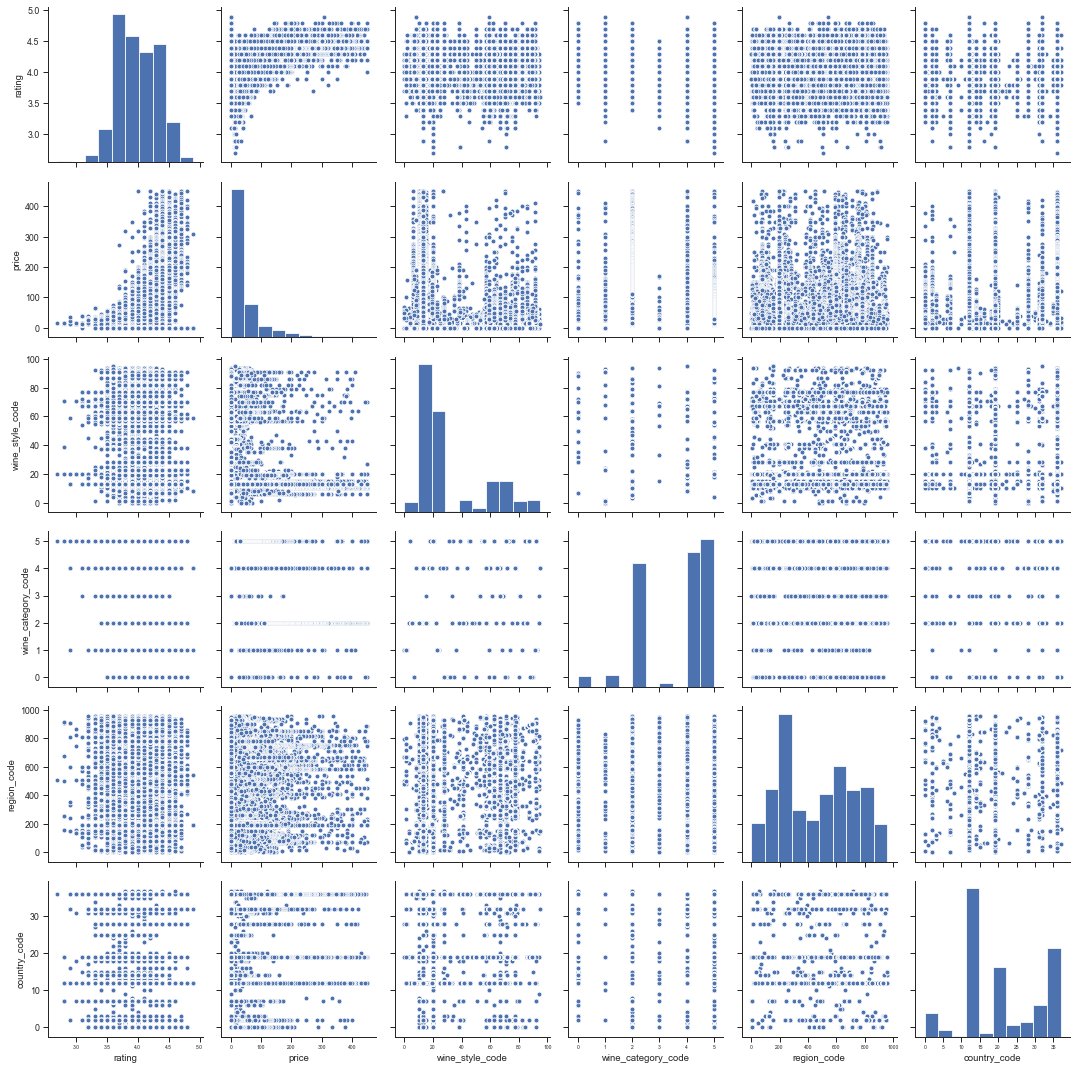

In [63]:
sns.pairplot(wine_catalog);
sns.set_style("ticks")
sns.set_context("paper",rc={"xtick.labelsize":5})


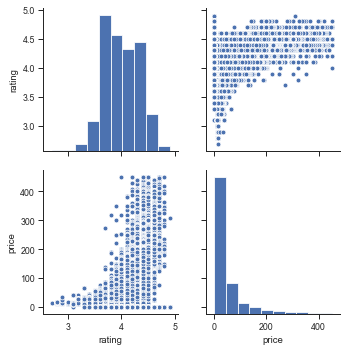

In [43]:
#Another look at the strength of correlation between wine ratings amd price
#Ratings of 4.1 to 4.5 appear to be found across all price points
#Ratings of 0.0 to 3.8 for the most part, remain well below $200 a bottle
#Ratings of 4.8 to 5.0 are clustered above $150 a bottle


sns.set_style("ticks")
sns.set_context("paper")
sns.pairplot(wine_catalog, vars=["rating", "price"]);

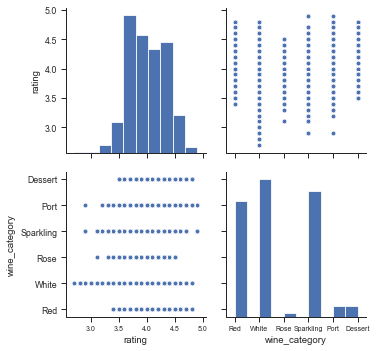

In [44]:
sns.set_style("ticks")
sns.set_context("paper",rc={"xtick.labelsize":7})
sns.pairplot(wine_catalog, vars=["rating", "wine_category"]);

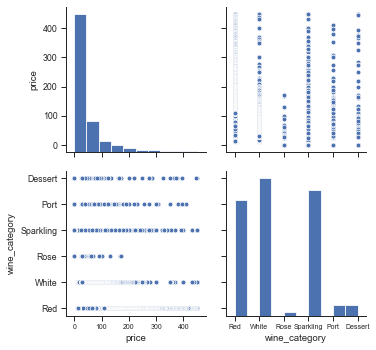

In [45]:
sns.set_style("ticks")
sns.set_context("paper",rc={"xtick.labelsize":7})
sns.pairplot(wine_catalog, vars=["price", "wine_category"]);

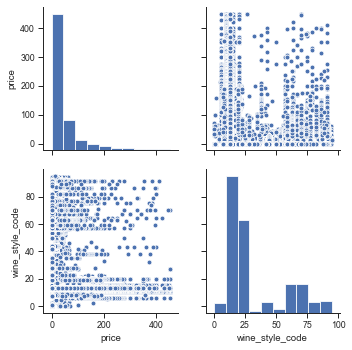

In [46]:
sns.set_style("ticks")
sns.set_context("paper")
sns.pairplot(wine_catalog, vars=["price", "wine_style_code"],palette="autumn");